In [1]:
#data manipulation
import pandas as pd
import numpy as np

# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [2]:
hour_df = pd.read_csv('hour.csv')
...: print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
hour_df.rename(columns={'instant':'rec_id',
...: 'dteday':'datetime',
...: 'holiday':'is_holiday',
...: 'workingday':'is_workingday',
...: 'weathersit':'weather_condition',
...: 'hum':'humidity',
...: 'mnth':'month',
...: 'cnt':'total_count',
...: 'hr':'hour',
...: 'yr':'year'},inplace=True)


In [5]:
# date time conversion
...: hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
...:
...: # categorical variables
...: hour_df['season'] = hour_df.season.astype('category')
...: hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
...: hour_df['weekday'] = hour_df.weekday.astype('category')
...: hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
...: hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
...: hour_df['month'] = hour_df.month.astype('category')
...: hour_df['year'] = hour_df.year.astype('category')
...: hour_df['hour'] = hour_df.hour.astype('category')                                                         

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

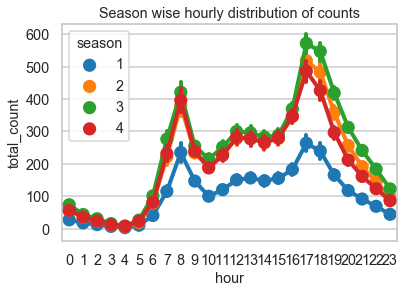

In [6]:
#here seaborns pointplot is used   
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                            'season']],
             x='hour',y='total_count',
              hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

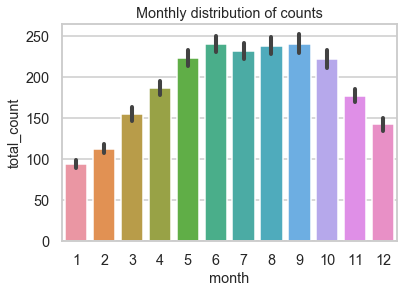

In [7]:
 fig,ax = plt.subplots()
...: sns.barplot(data=hour_df[['month',
...: 'total_count']],
...: x="month",y="total_count")
...: ax.set(title="Monthly distribution of counts")

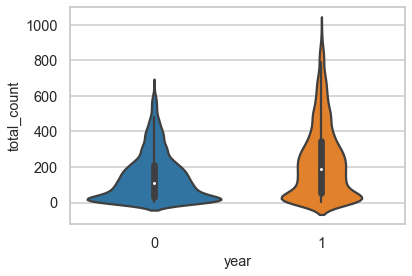

In [8]:
sns.violinplot(data=hour_df[['year',
...: 'total_count']],
...: x="year",y="total_count")

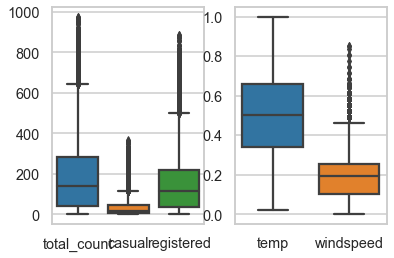

In [9]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
...: sns.boxplot(data=hour_df[['total_count',
...: 'casual','registered']],ax=ax1)
...: sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD06AF4FC8>,
      dtype=object)

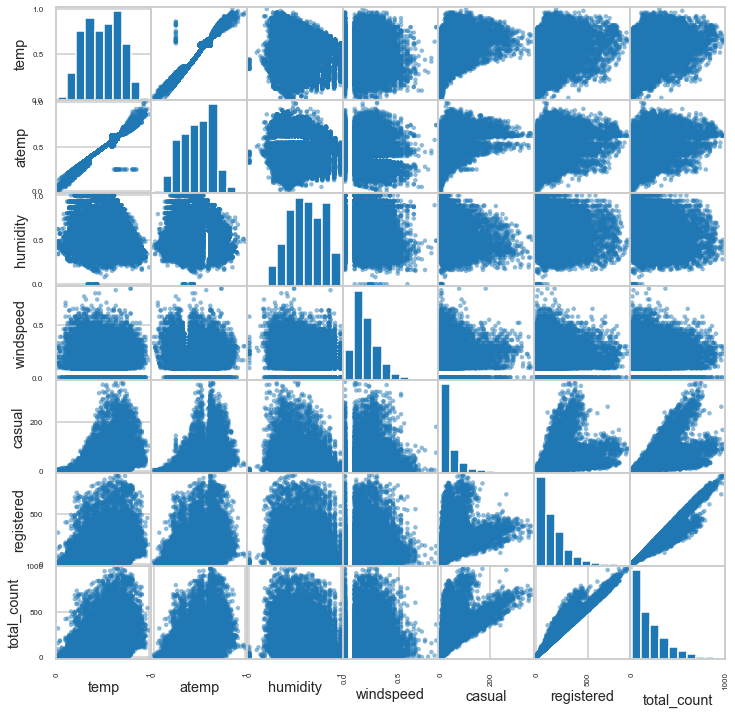

In [10]:
#Current part is about correlation in the data
from pandas.plotting import scatter_matrix
attributes= ["temp","atemp", "humidity","windspeed", "casual","registered", "total_count"]
scatter_matrix(hour_df[attributes], figsize = (12,12))

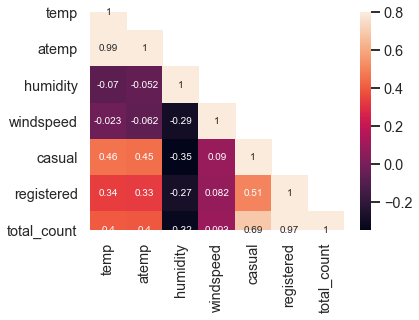

In [11]:
import numpy as np
corrMatt = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
Args:
    df(pandas.DataFrame): the data frame containing the mentioned column name
    col_name: the column to be one hot encoded

Returns:
    tuple: label_encoder, one_hot_encoder, transformed column as pandas Series 
   """

# label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
# one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

In [13]:
#here I have used from sklearn.model_selection import train_test_split to split the data into train and test.
#
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                        hour_df.iloc[:,-1],
                                        test_size=0.33,
                                    random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()
print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


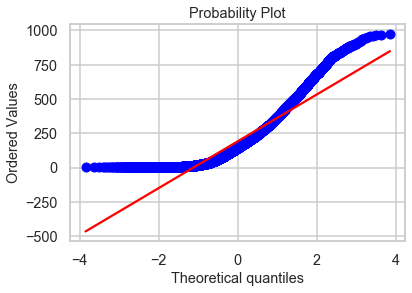

In [14]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [15]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']



In [16]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

C:\Users\imran\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\imran\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [17]:
feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                                if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


In [18]:
###Linear regression 

X = train_df_new
y = y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

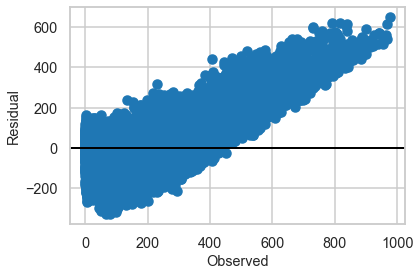

In [19]:
# Cross validation

predicted = cross_val_predict(lin_reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [20]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')